#Importação das bibliotecas

In [127]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


#Load do nosso conjunto de dados

In [128]:
# Carrega o conjunto de dados
pima = pd.read_csv("speedDating_trab.csv")

#Imprime o nosso conjunto de dados

In [129]:
pima

,Unnamed: 0,id,partner,age,age_o,goal,date,go_out,int_corr,length,met,like,prob,match
0,1,1.0,1,21.0,27.0,2.0,7.0,1.0,0.14,2.0,1.0,7.0,6.0,0
1,2,1.0,2,21.0,22.0,2.0,7.0,1.0,0.54,2.0,1.0,7.0,5.0,0
2,3,1.0,3,21.0,22.0,2.0,7.0,1.0,0.16,2.0,1.0,7.0,NaN,1
3,4,1.0,4,21.0,23.0,2.0,7.0,1.0,0.61,2.0,1.0,7.0,6.0,1
4,5,1.0,5,21.0,24.0,2.0,7.0,1.0,0.21,2.0,1.0,6.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,8374,22.0,18,25.0,26.0,1.0,2.0,1.0,0.64,1.0,0.0,2.0,5.0,0
8374,8375,22.0,19,25.0,24.0,1.0,2.0,1.0,0.71,1.0,0.0,4.0,4.0,0
8375,8376,22.0,20,25.0,29.0,1.0,2.0,1.0,-0.46,1.0,0.0,6.0,5.0,0
8376,8377,22.0,21,25.0,22.0,1.0,2.0,1.0,0.62,1.0,0.0,5.0,5.0,0


#Vai contar o número de NaN que existe em cada coluna

In [130]:
pima.isnull().sum()

Unnamed: 0      0
id              1
partner         0
age            95
age_o         104
goal           79
date           97
go_out         79
int_corr      158
length        915
met           375
like          240
prob          309
match           0
dtype: int64

#A estratégia vai ser preencher todos os NaN a zero

In [131]:

pima=pima.fillna(0)

#Convertemos todas as colunas exceto o partner, o prob, o like e o match para inteiro

In [132]:
#convertemos de float para int
pima[['met','length','go_out','date','goal','age_o','age','id']]=  pima[['met','length','go_out','date','goal','age_o','age','id']].astype(int)

pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8378 non-null   int64  
 1   id          8378 non-null   int64  
 2   partner     8378 non-null   int64  
 3   age         8378 non-null   int64  
 4   age_o       8378 non-null   int64  
 5   goal        8378 non-null   int64  
 6   date        8378 non-null   int64  
 7   go_out      8378 non-null   int64  
 8   int_corr    8378 non-null   float64
 9   length      8378 non-null   int64  
 10  met         8378 non-null   int64  
 11  like        8378 non-null   float64
 12  prob        8378 non-null   float64
 13  match       8378 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 916.5 KB


#Aqui vamos verificar a quantidade de zeros e uns que existe na coluna match

In [133]:

print("% 1's:",pima['match'].mean())
print("% 0's:", 1-pima['match'].mean())


% 1's: 0.16471711625686322
% 0's: 0.8352828837431368


#Confirma se todos os NaN foram substituídos

In [134]:
pima.isnull().sum()


Unnamed: 0    0
id            0
partner       0
age           0
age_o         0
goal          0
date          0
go_out        0
int_corr      0
length        0
met           0
like          0
prob          0
match         0
dtype: int64

#Confirmar se a tabela foi convetida da maneira que queríamos

In [135]:
pima.head(10)


,Unnamed: 0,id,partner,age,age_o,goal,date,go_out,int_corr,length,met,like,prob,match
0,1,1,1,21,27,2,7,1,0.14,2,1,7.0,6.0,0
1,2,1,2,21,22,2,7,1,0.54,2,1,7.0,5.0,0
2,3,1,3,21,22,2,7,1,0.16,2,1,7.0,0.0,1
3,4,1,4,21,23,2,7,1,0.61,2,1,7.0,6.0,1
4,5,1,5,21,24,2,7,1,0.21,2,1,6.0,6.0,1
5,6,1,6,21,25,2,7,1,0.25,2,1,6.0,5.0,0
6,7,1,7,21,30,2,7,1,0.34,2,1,6.0,5.0,0
7,8,1,8,21,27,2,7,1,0.50,2,0,6.0,7.0,0
8,9,1,9,21,28,2,7,1,0.28,2,1,7.0,7.0,1
9,10,1,10,21,24,2,7,1,-0.36,2,1,6.0,6.0,0


#Divisão dos casos variável objetivo com os restantes e o split do conjunto de dados em casos teste e treino

In [136]:

#divisao do casos em q tem match e os q n tem match
resultados = pima['match']
dados = pima.drop(['match'],axis=1)

# Separa o nosso conjunto de dados em treino e teste (30%/70%)
dados_treino, dados_teste, resultados_treino, resultados_teste= train_test_split( dados, resultados, test_size=0.3,random_state=1)

#ID3 COM ENTROPIA

##Método Holdout

###Aplicação, treino e predict do ID3

In [137]:

#modelo a aplicar (ID3)
clf = DecisionTreeClassifier(criterion="entropy")

#treina o nosso modelo
clf = clf.fit(dados_treino, resultados_treino)

#dá uma previsão 
predicted_test = clf.predict(dados_teste)

###Apresentação da Accuracy do modelo, da sua matriz de confusão e o seu classification report

In [138]:

print("Accuracy:",metrics.accuracy_score(resultados_teste, predicted_test))

print("Matriz de confusão:\n",confusion_matrix(resultados_teste, clf.predict(dados_teste)))

print("Classification Report:\n",classification_report(resultados_teste, clf.predict(dados_teste)))


Accuracy: 0.7856006364359587
Matriz de confusão:
 [[1828  279]
 [ 260  147]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      2107
           1       0.35      0.36      0.35       407

    accuracy                           0.79      2514
   macro avg       0.61      0.61      0.61      2514
weighted avg       0.79      0.79      0.79      2514



##Método Validação Cruzada (Cross-Validation)

###Vamos dividir o nosso conjunto de dados em 10 e cada uma das partições vai ser testada como teste e as restantes como treino.
Apresentação da Accuracy de todas as partições, a média dessas Accuracies, matriz de confusão de cada partição e soma total das matrizes de confusão

In [139]:
#divide o nosso conjunto de dados em 10
kf = KFold(n_splits=10,shuffle=False)
kf.split(dados)

scores=cross_val_score(DecisionTreeClassifier(criterion="entropy"), dados, resultados, cv=10, scoring='accuracy')
print("Cross Validation:\n", scores)
print("A média para Cross-Validation do K-fold é: {}".format(scores.mean()),"\n")

# Inicializa o array a zero que vai guardar a nossa matriz de confusão
array = [[0,0],[0,0]]
print("MATRIZ DE CONFUSÃO DE CADA K-FOLD:")

# para cada split train test vai treinar, prever e fazer a matriz de confusão
for train_index, test_index in kf.split(dados):
    # split train test
    dados_treino, dados_teste = dados.iloc[train_index], dados.iloc[test_index]
    resultados_treino, resultados_teste = resultados.iloc[train_index], resultados.iloc[test_index]
    # treina o modelo
    model = clf.fit(dados_treino, resultados_treino)
    # calcula a matriz de confusão
    score=confusion_matrix(resultados_teste, model.predict(dados_teste))
    print(score)
    
    c = score
    # soma as matrizes de confusões
    array = array+c
print("\n SOMA DA MATRIZ DE CONFUSÃO DE TODOS OS K-FOLD:\n",array,"\n")

Cross Validation:
 [0.74224344 0.70047733 0.73389021 0.68138425 0.72315036 0.73031026
 0.77684964 0.65632458 0.72640382 0.76583035]
A média para Cross-Validation do K-fold é: 0.7236864241252571 

MATRIZ DE CONFUSÃO DE CADA K-FOLD:
[[550 159]
 [ 78  51]]
[[593  85]
 [114  46]]
[[553 124]
 [104  57]]
[[562 144]
 [ 95  37]]
[[583 125]
 [ 91  39]]
[[588 140]
 [ 73  37]]
[[591  98]
 [109  40]]
[[555 126]
 [110  47]]
[[601 104]
 [107  25]]
[[601 116]
 [ 88  32]]

 SOMA DA MATRIZ DE CONFUSÃO DE TODOS OS K-FOLD:
 [[5777 1221]
 [ 969  411]] 



#NAIVE BAYES

##Método Holdout

###Implementação do Gaussian Naive Bayes

In [141]:

#Chama o modelo Gaussian
gnb = GaussianNB()

#treina o modelo
gnb.fit(dados_treino,resultados_treino)

#dá uma previsão
predicted3 = gnb.predict(dados_teste)



###Apresentação da Accuracy, matriz de confusão e classification report

In [142]:
print("Accuracy:",metrics.accuracy_score(resultados_teste, predicted3))

print("Matriz de confusão:\n",confusion_matrix(resultados_teste, gnb.predict(dados_teste)))

print(classification_report(resultados_teste,gnb.predict(dados_teste)))

Accuracy: 0.8649940262843488
Matriz de confusão:
 [[710   7]
 [106  14]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       717
           1       0.67      0.12      0.20       120

    accuracy                           0.86       837
   macro avg       0.77      0.55      0.56       837
weighted avg       0.84      0.86      0.82       837



##Método Validação Cruzada (Cross-Validation)

###Vamos dividir o nosso conjunto de dados em 10 e cada uma das partições vai ser testada como teste e as restantes como treino.
Apresentação da Accuracy de todas as partições, a média dessas Accuracies, matriz de confusão de cada partição e soma total das matrizes de confusão

In [143]:


kf = KFold(n_splits=10,shuffle=False)
kf.split(dados)

scores=cross_val_score(GaussianNB(), dados, resultados, cv=10, scoring='accuracy')
print("Cross Validation:\n", scores)
print("A média para Cross-Validation do K-fold é: {}".format(scores.mean()),"\n")

# Inicializa o array a zero que vai guardar a nossa matriz de confusão
array = [[0,0],[0,0]]
print("MATRIZ DE CONFUSÃO DE CADA K-FOLD:")
# para cada split train test vai treinar, prever e fazer a matriz de confusão
for train_index, test_index in kf.split(dados):
    # split train test
    dados_treino, dados_teste = dados.iloc[train_index], dados.iloc[test_index]
    resultados_treino, resultados_teste = resultados.iloc[train_index], resultados.iloc[test_index]
     # treina o modelo
    model = gnb.fit(dados_treino, resultados_treino)
    # calcula a matriz de confusão
    score=confusion_matrix(resultados_teste, model.predict(dados_teste))
    print(score )
    c = score
    # soma as matrizes de confusões
    array = array + c
print("\n SOMA DA MATRIZ DE CONFUSÃO DE TODOS OS K-FOLD:\n",array,"\n")

Cross Validation:
 [0.79713604 0.81264916 0.83770883 0.78520286 0.8353222  0.81264916
 0.84844869 0.79116945 0.81242533 0.84468339]
A média para Cross-Validation do K-fold é: 0.8177395117806234 

MATRIZ DE CONFUSÃO DE CADA K-FOLD:
[[604 105]
 [ 70  59]]
[[641  37]
 [121  39]]
[[638  39]
 [113  48]]
[[606 100]
 [ 86  46]]
[[691  17]
 [112  18]]
[[686  42]
 [ 96  14]]
[[677  12]
 [124  25]]
[[602  79]
 [104  53]]
[[660  45]
 [110  22]]
[[710   7]
 [106  14]]

 SOMA DA MATRIZ DE CONFUSÃO DE TODOS OS K-FOLD:
 [[6515  483]
 [1042  338]] 



##Curva de aprendizagem para o Gaussian Naive Bayes com o método Cross-Validation

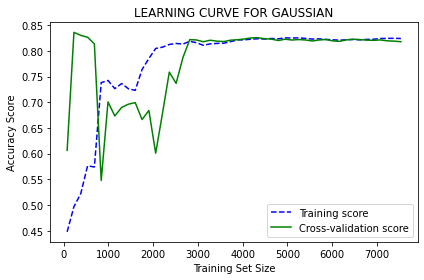

In [144]:

# cv é o número de folds enquanto faz Cross-Validation
sizes, training_scores, testing_scores = learning_curve(GaussianNB(), dados, resultados, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Média e desvio padrão do score do treino
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Média e desvio padrão do score do teste
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# azul trajecado é para os valores de treino e a linha verde para o valor cross.-validation
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Desenha gráfico
plt.title("LEARNING CURVE FOR GAUSSIAN")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()